In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [7]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


<AxesSubplot:>

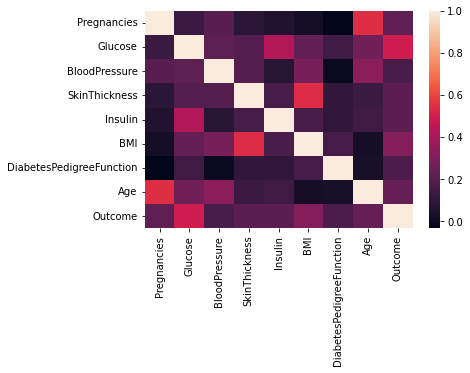

In [9]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

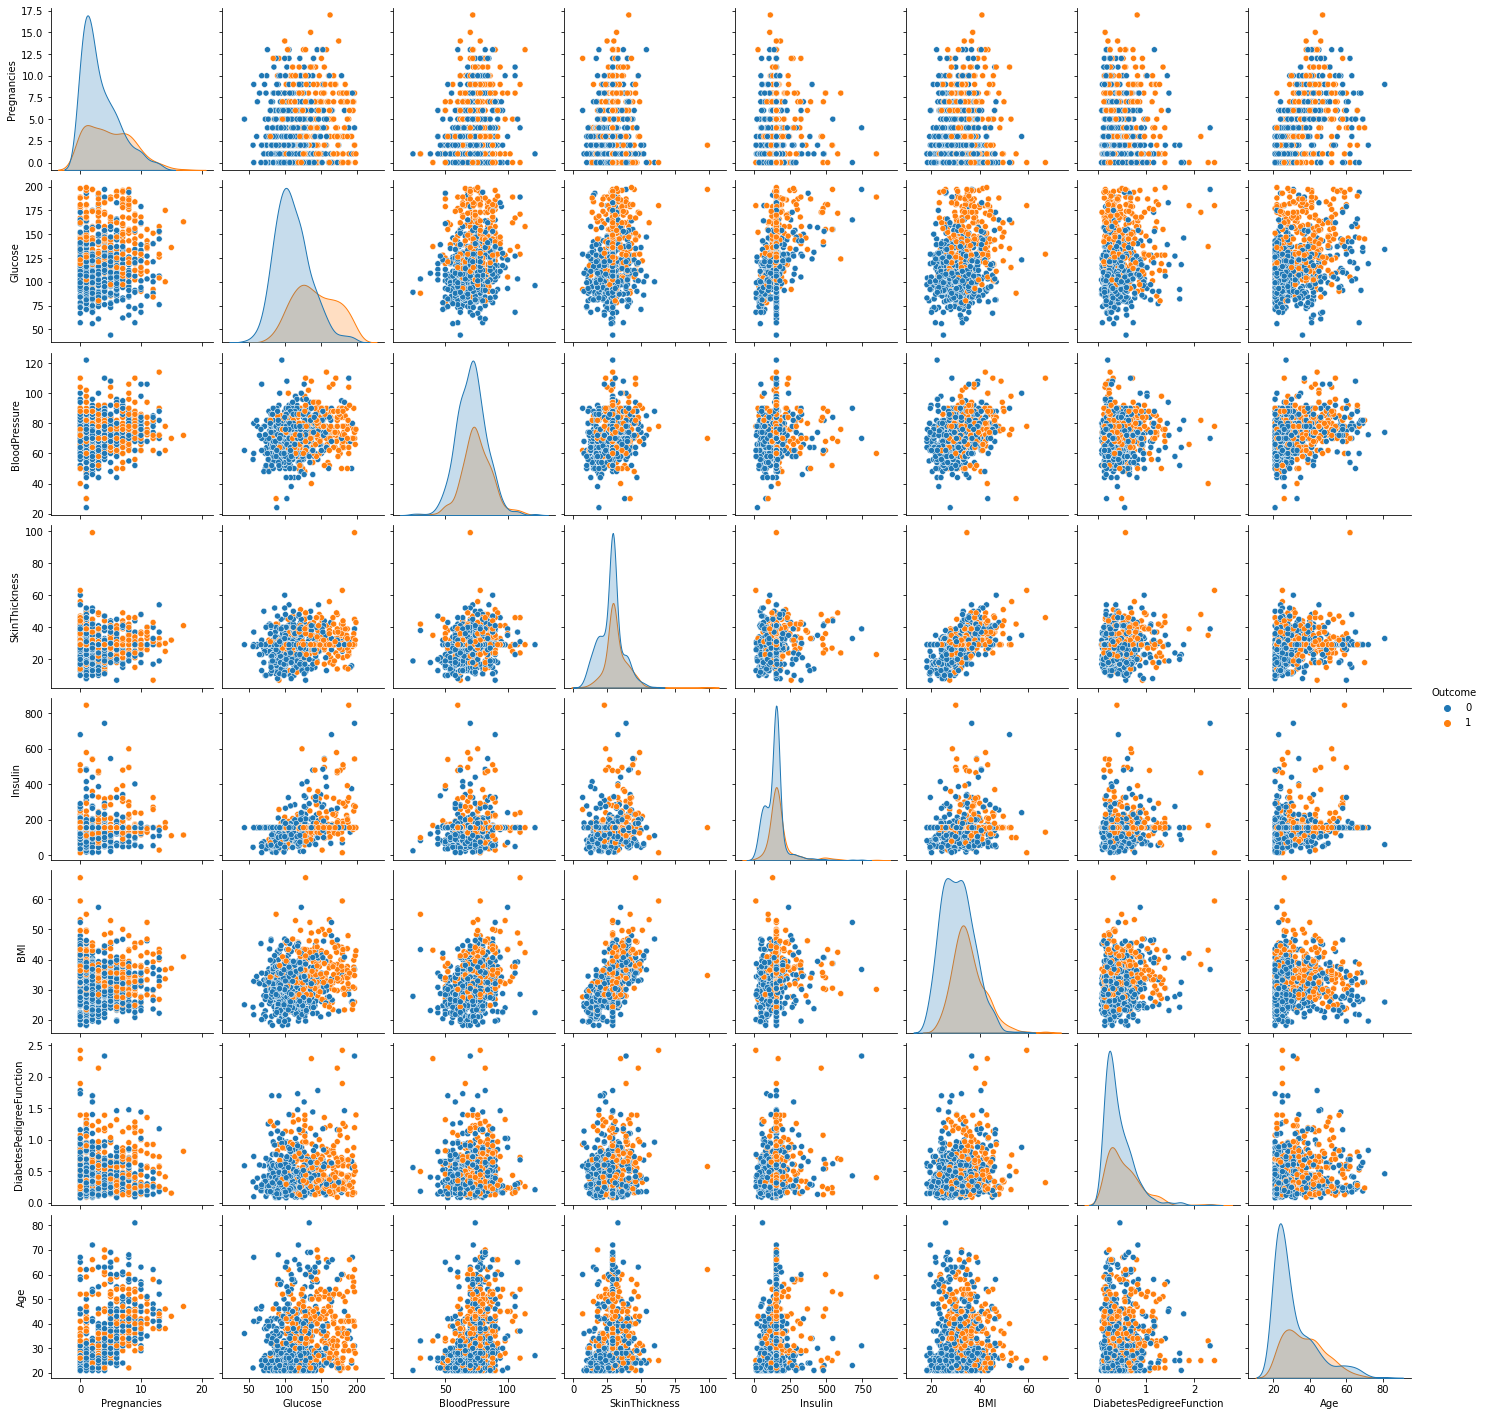

In [10]:
sns.pairplot(df,hue='Outcome')

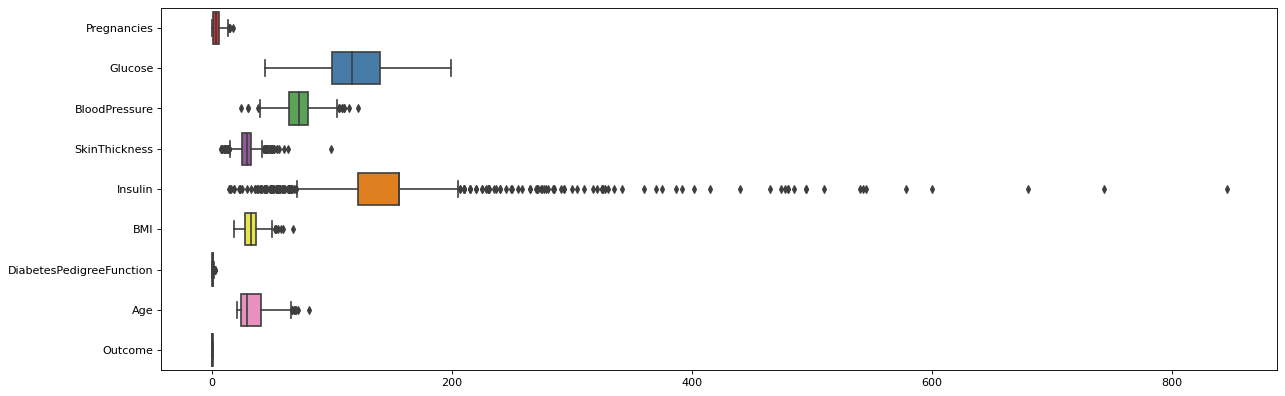

In [11]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h",
            palette="Set1")

plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

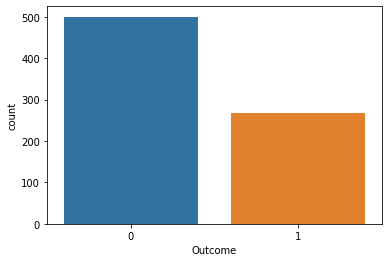

In [12]:
sns.countplot(x="Outcome", data=df)

In [13]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [15]:
X_train.shape

(614, 8)

In [16]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.7662337662337663

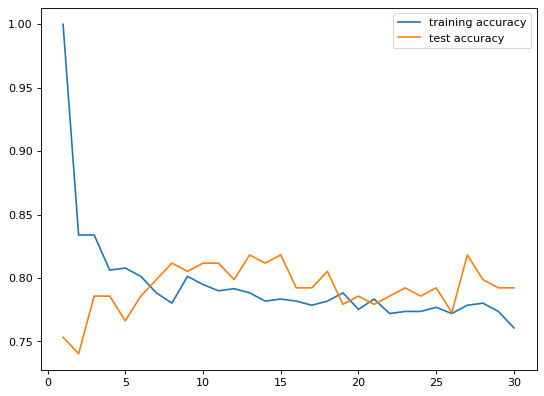

In [19]:
training_accuracy = []
test_accuracy = []# try n_neighbors from 1 to 30.
neighbors_settings = range(1, 31)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.figure(figsize=(8, 6), dpi=80)
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

In [20]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.8116883116883117

In [21]:
df.to_csv('data.csv', index = False)
data = pd.read_csv('data.csv')

In [22]:
data_x=data.drop('Outcome',axis=1)


In [23]:
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data,k):
    x = data[['BloodPressure','Glucose']].values
    y = data['Outcome'].astype(int).values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    print(knn.score(x,y))    
    #Plot decision region:
    plot_decision_regions(x,y,clf=knn, legend=2)    
    #Adding axes annotations:
    plt.title('KNN with k='+str(k))
    plt.show()

0.7669270833333334


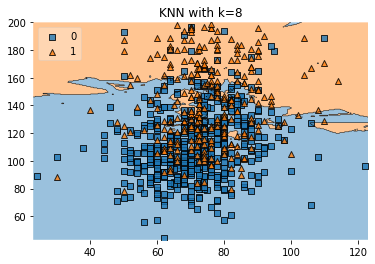

In [24]:
knn_comparison(df,8)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8116883116883117

0.9453125


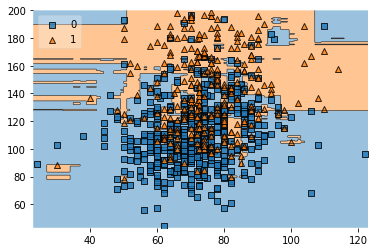

In [26]:
def rfc_comparison(data,k):
    x = data[['BloodPressure','Glucose']].values
    y = data['Outcome'].astype(int).values
    rfc = RandomForestClassifier()
    rfc.fit(x, y)
    print(rfc.score(x,y))    
    #Plot decision region:
    plot_decision_regions(x,y,clf=rfc, legend=2)    
    #Adding axes annotations:
    plt.show()
rfc_comparison(df,8)    

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.predict(X_test)
svm.score(X_test, y_test)

0.7727272727272727

0.7447916666666666


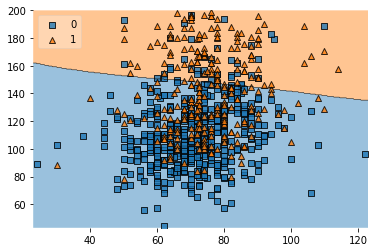

In [28]:
def svm_comparison(data,k):
    x = data[['BloodPressure','Glucose']].values
    y = data['Outcome'].astype(int).values
    rfc = SVC()
    rfc.fit(x, y)
    print(rfc.score(x,y))    
    #Plot decision region:
    plot_decision_regions(x,y,clf=rfc, legend=2)    
    #Adding axes annotations:
    plt.show()
svm_comparison(df,8)    

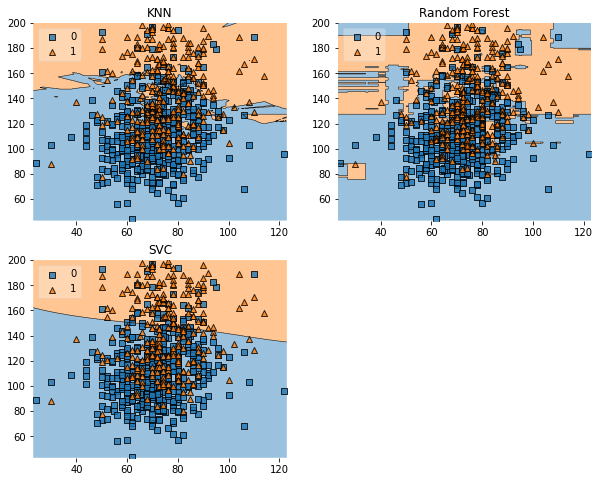

In [29]:
import matplotlib.gridspec as gridspec
import itertools
X = data[['BloodPressure','Glucose']].values
y = data['Outcome'].astype(int).values

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['KNN','Random Forest','SVC']
for clf, lab, grd in zip([knn,rfc,svm],labels,itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Evaluation

<AxesSubplot:>

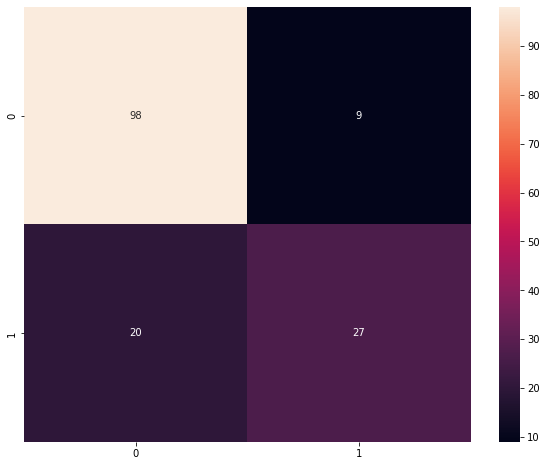

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [31]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.83      0.92      0.87       107
      Normal       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154



In [32]:
from sklearn.metrics import roc_curve
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)


y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

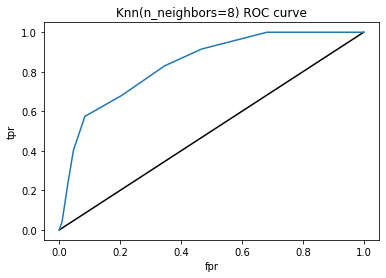

In [33]:
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [34]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8387353350566713

In [35]:
#!pip install mglearn
#import mglearn

In [36]:
#mglearn.plots.plot_knn_classification(n_neighbors=3)